<h1 align="center"> CSE 242 Assignment 5, Spring 2025

    Your name: Mengxiao Hu   Student ID: mhu110(2172399)

## Instruction 

- Submit your assignments onto **canvas** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Coding)
- **Task 2:** Neural Networks



# Question 1. (EM algorithm, 40 pts)

#### **Question 1.1.** Implement EM Algorithm in Python from scratch.


In [1]:
from scipy.stats import multivariate_normal 
import numpy as np


def e_step(data, mu, sigma, pi, k):

  ########################
  #### YOUR CODE HERE ####
  ########################

  n, d = data.shape
  weights = np.zeros((n, k))
  
  # Calculate likelihood for each data point under each Gaussian component
  for i in range(k):
    weights[:, i] = pi[i] * multivariate_normal.pdf(data, mu[i], sigma[i])
  
  # Normalize weights so each row sums to 1
  row_sums = weights.sum(axis=1, keepdims=True)
  weights = weights / (row_sums + 1e-10)

  # Creates a n*k matrix denoting probability of each point wrt each cluster 
  return weights

def m_step(data, mu, sigma, pi, weights, k):

  ##################################################
  #### YOUR CODE HERE ##############################
  # HERE YOU WILL UPDATED VALUES OF mu, sigma and pi
  ##################################################
  
  n, d = data.shape
  
  # Calculate effective number of points assigned to each cluster
  N_k = weights.sum(axis=0)
  
  # Update cluster means
  for i in range(k):
    mu[i] = np.sum(weights[:, i:i+1] * data, axis=0) / N_k[i]
  
  # Update cluster covariance matrices
  for i in range(k):
    centered_data = data - mu[i]
    sigma[i] = np.zeros((d, d))
    for j in range(n):
      sigma[i] += weights[j, i] * np.outer(centered_data[j], centered_data[j])
    sigma[i] /= N_k[i]
    sigma[i] += 1e-6 * np.eye(d)  # Regularization
  
  # Update cluster prior probabilities
  pi = N_k / n

  return mu, sigma, pi      # updated mu, sigma, pi


def gmm(data, mu, sigma, pi, k, max_iterations=1000):    
  for j in range(max_iterations):
    # update cluter assignment weights
    weights = e_step(data, mu, sigma, pi, k)    # WRITE CODE FOR E-Step
        
    # update mu, sigma and prior proabilities locations
    mu, sigma, pi = m_step(data, mu, sigma, pi, weights, k)  # WRITE CODE FOR M-Step
        
  # final assignment update
  weights = e_step(data, mu, sigma, pi, k)
  assignments = np.argmax(weights, axis=1)      # pick cluster with maximum probability weight for cluster assignment

  return mu, sigma, pi, assignments

#### **Question 1.2.** Run your code on following toy dataset similar to K-Means in the Assignment 4 for different k-values, where k = {3, 4} and 

1. visualize 2D gaussian ellipses with $\mu$ and $\Sigma$ you obtained.
2. plot the cluster assignments for different k's (as done in assignment 4) for both GMM and K-Means side by side for comparison. 
3. Write your observations (open question)

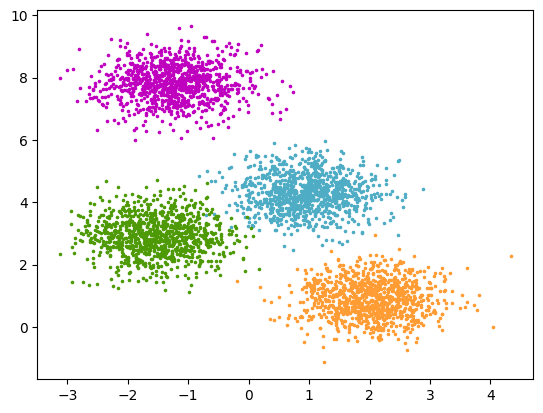

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


In [3]:
#############################################################
#### KMEANS #####
#### My implementation of KMEANS from assignment 4 ####
#############################################################

import numpy as np

def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####

  ## you will get cluster# 
  ##assignments here #####
  ########################

  n_samples = data.shape[0]
  k = centroids.shape[0]
    
  distances = np.zeros((n_samples, k))
    
  for i in range(k):
    distances[:, i] = np.sum((data - centroids[i])**2, axis=1)
    
  assignments = np.argmin(distances, axis=1)
    
  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################

  k = centroids.shape[0]
    
  for i in range(k):
    mask = (assignments == i)
    if np.any(mask):
      centroids[i] = np.mean(data[mask], axis=0)
    
  return centroids


def kmeans(data, centroids, max_iterations = 100):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments


def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]

  return initial_centroids

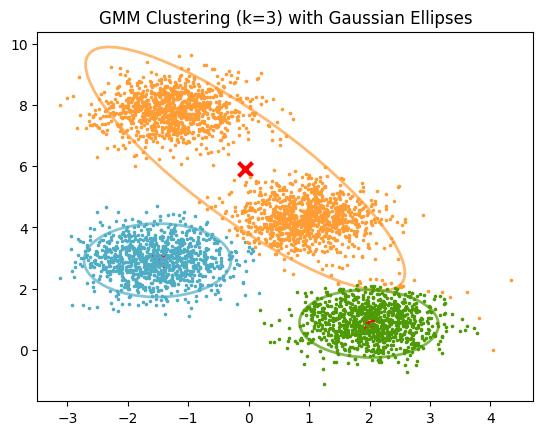

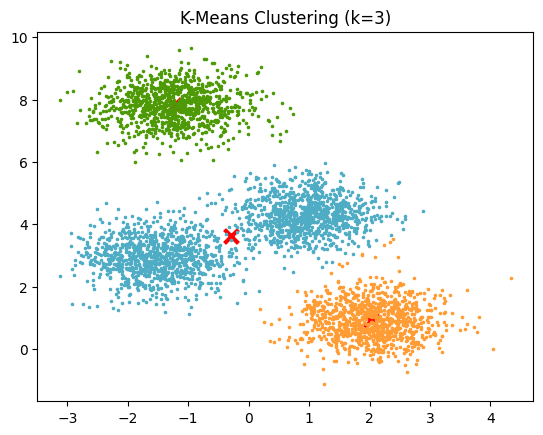

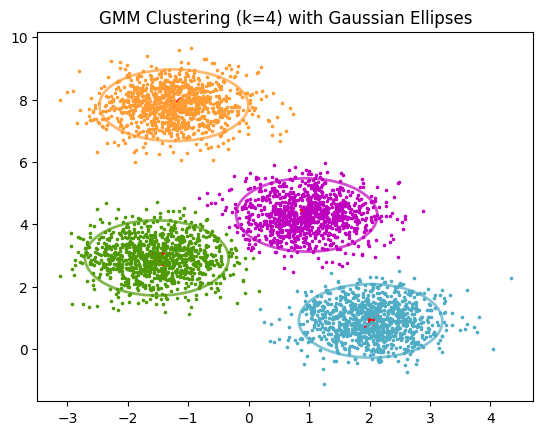

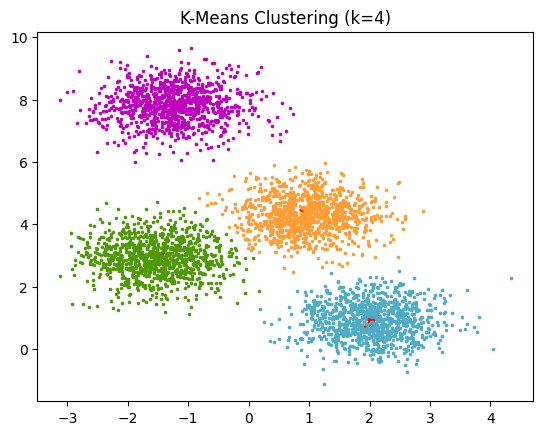

In [4]:

import numpy as np
from matplotlib.patches import Ellipse

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_parameters(k, X):

  # initial weights given to each cluster are stored in phi or P(Ci=j)
  pi = np.full(shape=k, fill_value=1/k) 

  # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
  z_ik = np.full(shape=X.shape, fill_value=1/k)

  # dataset is divided randomly into k parts of unequal sizes
  random_row = np.random.randint(low=0, high=X.shape[0], size=k)

  # initial value of mean of k Gaussians
  mu = [  X[row_index,:] for row_index in random_row ] 

  # initial value of covariance matrix of k Gaussians
  sigma = [ np.cov(X.T) for _ in range(k) ] 
  
  return pi, z_ik, mu, sigma

# your code here.
for k in [3, 4]:

  pi_initial, z_ik_initial, mu_initial, sigma_initial = get_initial_parameters(k, X)

  ########################
  #### YOUR CODE HERE ####
  ########################

  # Convert initial parameters to numpy arrays
  mu_initial = np.array(mu_initial)
  sigma_initial = np.array(sigma_initial)
  pi_initial = np.array(pi_initial)
  
  # Run GMM algorithm
  mu_final, sigma_final, pi_final, gmm_cluster_assignments = gmm(X, mu_initial, sigma_initial, pi_initial, k)
  
  # Plot Gaussian ellipses
  for i in range(k):
      eigenvals, eigenvecs = np.linalg.eigh(sigma_final[i])
      order = eigenvals.argsort()[::-1]
      eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
      theta = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
      width, height = 2 * np.sqrt(eigenvals) * 2
      ellipse = Ellipse(mu_final[i], width, height, angle=theta, facecolor='none', edgecolor=colors[i], linewidth=2, alpha=0.7)
      plt.gca().add_patch(ellipse)
  
  # Plot cluster means
  plt.scatter(mu_final[:, 0], mu_final[:, 1], c='red', marker='x', s=100, linewidth=3)
  plt.title(f'GMM Clustering (k={k}) with Gaussian Ellipses')

  for i, col in enumerate(colors):
      cluster_data = gmm_cluster_assignments == i
      plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
  plt.show()


  #############################################################
  #### KMEANS #####
  #### Use your implementation of KMEANS from assignment 4 ####
  #############################################################

  ########################
  #### YOUR CODE HERE ####
  ########################
   
  # Initialize centroids and run K-Means
  centroids = get_initial_clusters(k, X)
  centroids, kmeans_cluster_assignments = kmeans(X, centroids)
  
  # Plot centroids
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, linewidth=3)
  plt.title(f'K-Means Clustering (k={k})')

  for i, col in enumerate(colors):
      cluster_data = kmeans_cluster_assignments == i
      plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
  plt.show()

  #############################################################################
  #### Observations on Comparison of GMM vs KMEANS ############################
  #############################################################################
  #### GMM and KMEANS may have similar or quite diffierent results on same workloads

# Question 2. Neural Networks (60 pts)


Consider the following neural network:

where $a_i = \Sigma_j w_j^i z_j$ , $z_i = f_i(a_i)$ for $i= 1, 2,3,4, z_5 = a_5$ (an input neuron), and $f_1(x) = f_2(x) = f_3(x) = f_4(x) = $ sigmoid$(x)$.


### **Question 2.1**. Write a function to simulate the neural network (10 pts) ###


**Answer:**

$$a_3 = w_5^3 z_5$$

$$a_4 = w_5^4 z_5$$

$$a_2 = w_5^2 z_5$$

$$a_1 = w_2^1 z_2 + w_3^1 z_3 + w_4^1 z_4$$

$$z_1 = sigmoid(a_1)$$


### **Question 2.2** Deduce the equation to calculate $δ_i$ (the error value per neuron) for all the neurons. (20 pts) ###
Write a function that given a training sample and the weights of the network calculate $δ_i$ for each neuron.

**Hint:**
########################################

#### **SIGMOID** ####
$$f(x) = \dfrac{1}{1+e^{-x}} $$
$$df(x)/dx = f(x)(1-f(x))$$

########################################
#### **LOSS FUNCTION** ####
$$error = 0.5*(z_1 - target)^2$$
########################################

#### **DERIVATES** ####
$\partial{error}/\partial{w^1_3} = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial w^1_3$ (using chain rule)

$δ_5 =  \partial error/\partial w^3_5 + \partial error/\partial w^2_5 + \partial error/\partial w^4_5$ (total error from connected neurons)


**Answer:**

$\partial{error}/\partial{w^1_3} = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial w^1_3$

$\partial error/\partial z_1 = z_1 - target$

$\partial z_1/\partial a_1 = z_1(1 - z_1)$

$\partial a_1/\partial w^1_3 = z_3$

$\partial{error}/\partial{w^1_3} = (z_1 - target) \cdot z_1(1 - z_1) \cdot z_3$

########################################

$\partial{error}/\partial{w^1_4} = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial w^1_4$

$\partial{error}/\partial{w^1_4} = (z_1 - target) \cdot z_1(1 - z_1) \cdot z_4$

########################################

$\partial{error}/\partial{w^1_2} = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial w^1_2$

$\partial{error}/\partial{w^1_2} = (z_1 - target) \cdot z_1(1 - z_1) \cdot z_2$

########################################

$\partial error/\partial w^3_5 = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial z_3 \cdot \partial z_3/\partial a_3 \cdot \partial a_3/\partial w^3_5$

$\partial error/\partial w^3_5 = (z_1 - target) \cdot z_1(1 - z_1) \cdot w^1_3 \cdot z_3(1 - z_3) \cdot z_5$

########################################

$\partial error/\partial w^4_5 = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial z_4 \cdot \partial z_4/\partial a_4 \cdot \partial a_4/\partial w^4_5$

$\partial error/\partial w^4_5 = (z_1 - target) \cdot z_1(1 - z_1) \cdot w^1_4 \cdot z_4(1 - z_4) \cdot z_5$

########################################

$\partial error/\partial w^2_5 = \partial error/\partial z_1 \cdot \partial z_1/\partial a_1 \cdot \partial a_1/\partial z_2 \cdot \partial z_2/\partial a_2 \cdot \partial a_2/\partial w^2_5$

$\partial error/\partial w^2_5 = (z_1 - target) \cdot z_1(1 - z_1) \cdot w^1_2 \cdot z_2(1 - z_2) \cdot z_5$

########################################

$\delta_1 = (z_1 - target) \cdot z_1(1 - z_1)$

$\delta_2 = \delta_1 \cdot w^1_2 \cdot z_2(1 - z_2)$

$\delta_3 = \delta_1 \cdot w^1_3 \cdot z_3(1 - z_3)$

$\delta_4 = \delta_1 \cdot w^1_4 \cdot z_4(1 - z_4)$

$\delta_5 = \delta_2 \cdot w^2_5 + \delta_3 \cdot w^3_5 + \delta_4 \cdot w^4_5$



### **Question 2.3** (30 pts) ###

Implement a function to train the neural network using the stochastic gradient  descent. Use this function to train the network with the following training samples:

\begin{array}{ c c }
 x & y  \\ 
 -3.0 & 0.7312  \\  
 -2.0 & 0.7339   \\  
 -1.5 & 0.7438 \\  
 -1.0 & 0.7832 \\  
 -0.5 & 0.8903 \\  
 0.0 & 0.9820 \\  
 0.5 & 0.8114 \\  
 1.0 & 0.5937 \\  
 1.5 & 0.5219 \\  
 2.0 & 0.5049 \\  
 3.0 & 0.5002  
\end{array}

Plot the evolution of the error and the final predictions of the trained network. Write down the weights of the trained nettwork.

Error at epoch 0 is 0.02721
Error at epoch 100 is 0.00905
Error at epoch 200 is 0.00717
Error at epoch 300 is 0.00678
Error at epoch 400 is 0.00669
Error at epoch 500 is 0.00666
Error at epoch 600 is 0.00665
Error at epoch 700 is 0.00664
Error at epoch 800 is 0.00664
Error at epoch 900 is 0.00664


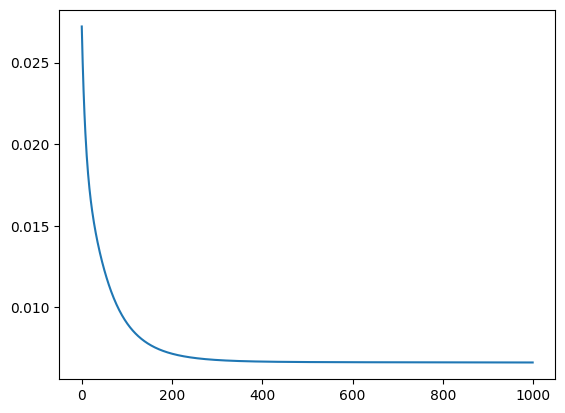

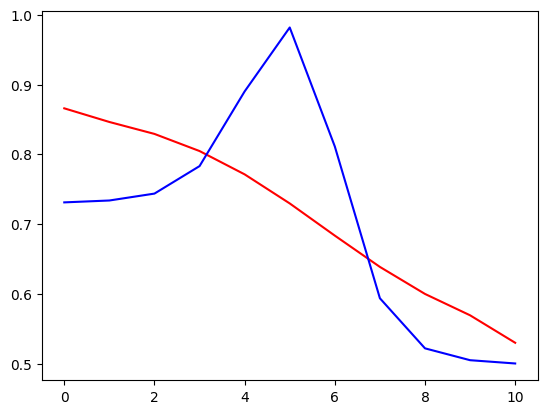

Weights of the network are: 
w13, w12, w14 [[ 0.77838274  1.25530616 -0.04741858]]
w35, w25, w45 [[-0.62967327 -1.04419634  0.3445388 ]]
[[0.86605874]
 [0.84649581]
 [0.82937236]
 [0.80481465]
 [0.77138746]
 [0.72970673]
 [0.68354429]
 [0.6386727 ]
 [0.59990871]
 [0.56927479]
 [0.52989405]]


In [5]:
##**Answer:**

import numpy as np 

# defining the backprop for Sigmoid Function
def back_sigmoid(x):
    return x * (1 - x)

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(X, weights_input_hidden, weights_hidden_output):

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(X, weights_input_hidden)   # Nx1 * 1x3 = Nx3
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)  # Nx3

    # calculating the output
    outputLayer_linearTransform = np.dot(hiddenLayer_activations, weights_hidden_output)              # Nx3 * 3x1 = Nx1
    output = sigmoid(outputLayer_linearTransform)                  # Nx1

    return output, hiddenLayer_activations


def backward_pass(X, y, output, weights_hidden_output, weights_input_hidden, hiddenLayer_activations):


    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = output - y     # Nx1
    output_wrt_outputLayer_LinearTransform = back_sigmoid(output)   # Nx1
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations  # Nx3

    # for w13, w12, w14
    output_delta = error_wrt_output * output_wrt_outputLayer_LinearTransform
    error_wrt_weights_hidden_output = np.dot(outputLayer_LinearTransform_wrt_weights_hidden_output.T, output_delta) # 3x1

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output.T       # 1x3
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = back_sigmoid(hiddenLayer_activations)   # Nx3
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X    # Nx1
  
    # for w35, w45, w25
    hidden_error = np.dot(output_delta, outputLayer_LinearTransform_wrt_hiddenLayer_activations)
    hidden_delta = hidden_error * hiddenLayer_activations_wrt_hiddenLayer_linearTransform
    error_wrt_weights_input_hidden = np.dot(hiddenLayer_linearTransform_wrt_weights_input_hidden.T, hidden_delta)  # 1x3

    return error_wrt_weights_hidden_output, error_wrt_weights_input_hidden


def train(X_train, y_train):

    # defining the model architecture
    inputLayer_neurons = 1  # number of neurons at input
    hiddenLayer_neurons = 3  # number of hidden layers neurons
    outputLayer_neurons = 1  # number of neurons at output layer

    # initializing weight
    weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
    weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))

    # defining the parameters
    lr = 0.1
    epochs = 1000

    losses =  []

    for ep in range(epochs):

        output_, hiddenLayer_activations = forward_pass(X_train, weights_input_hidden, weights_hidden_output)

        ## Backward Propagation
        # calculating error
        error = np.square(y_train - output_) / 2

        error_wrt_weights_hidden_output, error_wrt_weights_input_hidden = backward_pass(X_train, y_train, 
                                                                                      output_, 
                                                                                      weights_hidden_output, 
                                                                                      weights_input_hidden, 
                                                                                      hiddenLayer_activations)

        # updating the weights
        weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

        # print error at every 100th epoch
        epoch_loss = np.average(error)
        if ep % 100 == 0:
            print(f"Error at epoch {ep} is {epoch_loss:.5f}")

        # appending the error of each epoch
        losses.append(epoch_loss)

        import matplotlib.pyplot as plt
    plt.plot(losses)
    plt.show()

    final_pred, _ = forward_pass(X_train, weights_input_hidden, weights_hidden_output)

    plt.plot(final_pred, c='r')
    plt.plot(y_train, c='b')
    plt.show()

    print("Weights of the network are: ")
    print("w13, w12, w14", weights_hidden_output.T)
    print("w35, w25, w45", weights_input_hidden)

    print(final_pred) 

# defining training data
X_train = np.zeros((11, 1)).astype(np.float32)
y_train = np.zeros((11, 1)).astype(np.float32)

X_train[0] = -3
X_train[1] = -2
X_train[2] = -1.5
X_train[3] = -1.0
X_train[4] = -0.5
X_train[5] = 0.0
X_train[6] = 0.5
X_train[7] = 1.0
X_train[8] = 1.5
X_train[9] = 2.0
X_train[10] = 3.0


y_train[0] = 0.7312
y_train[1] = 0.7339
y_train[2] = 0.7438
y_train[3] = 0.7832
y_train[4] = 0.8903
y_train[5] = 0.9820
y_train[6] = 0.8114
y_train[7] = 0.5937
y_train[8] = 0.5219
y_train[9] = 0.5049
y_train[10] = 0.5002


train(X_train, y_train)